<a href="https://colab.research.google.com/github/Rahulhimself/Walmart-sales-prediction/blob/main/PredictiveModelingQ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem no 2

Using **ARIMA** model to find or forcast future values of the weekly sales for next 12 months

here we need to use numpy 1.26.4, Downgraded numpy to 1.26.4, reinstall your packages, and always restarting Python runtime afterwards to solve the binary incompatibility error for almost all current setups using pmdarima and similar libraries.

In [ ]:
!pip install numpy==1.26.4  # Ensures compatibility
!pip install scipy statsmodels pmdarima


importing required libraries and checking the versions of it

In [ ]:
import numpy
import scipy
import statsmodels
import pmdarima
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("statsmodels:", statsmodels.__version__)
print("pmdarima:", pmdarima.__version__)


numpy: 1.26.4
scipy: 1.16.1
statsmodels: 0.14.5
pmdarima: 2.0.4


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pmd

In [ ]:
df = pd.read_csv('/content/Walmart DataSet.csv')

checking mean and std of the weekly sales

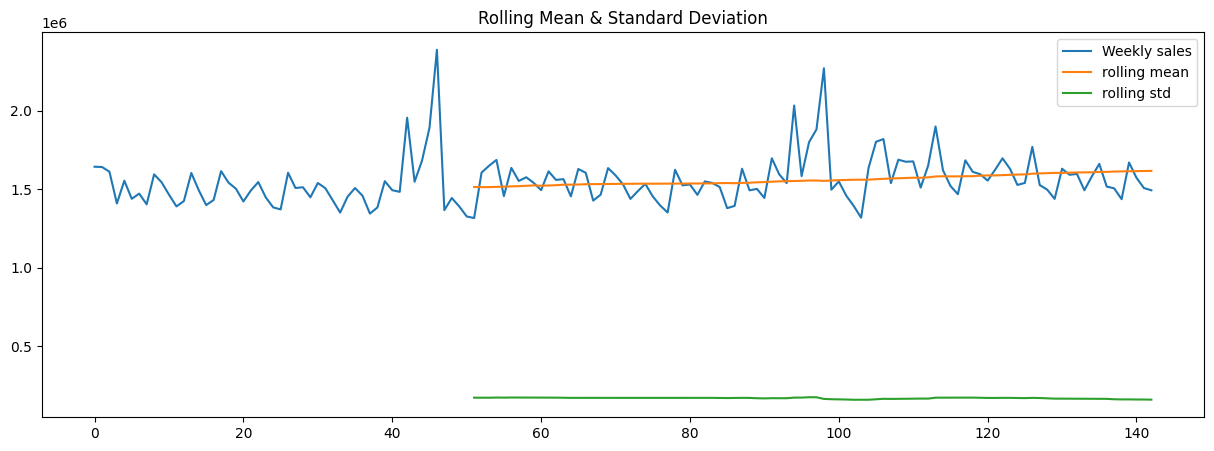

In [ ]:
plt.figure(figsize=(15,5))
store_01=df[df['Store']==1]['Weekly_Sales']
mean=store_01.rolling(52).mean()
std=store_01.rolling(52).std()
store_01=store_01.sort_index()
store_01.plot()
mean.plot()
std.plot()
plt.legend(labels=['Weekly sales','rolling mean','rolling std'])
plt.title('Rolling Mean & Standard Deviation')
store_01=store_01.dropna()

appling the ADF test results is the p-value of the test. This is the value that tells you whether time series is stationary.

In [ ]:
results=adfuller(store_01)
print("P-Values: ",results[1])

P-Values:  1.3877788330759434e-05


 p-value >= 0.05
 This means data likely contains a trend or seasonality

In [ ]:
model=pmd.auto_arima(store_01)
model.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Sun, 10 Aug 2025   AIC                           3807.686
Time:                        04:57:12   BIC                           3825.421
Sample:                             0   HQIC                          3814.893
                                - 143                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.3e+37. Standard errors may be unstable.
"""

In [ ]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Text(0.5, 1.0, 'Weekly sales forecast for store 1')

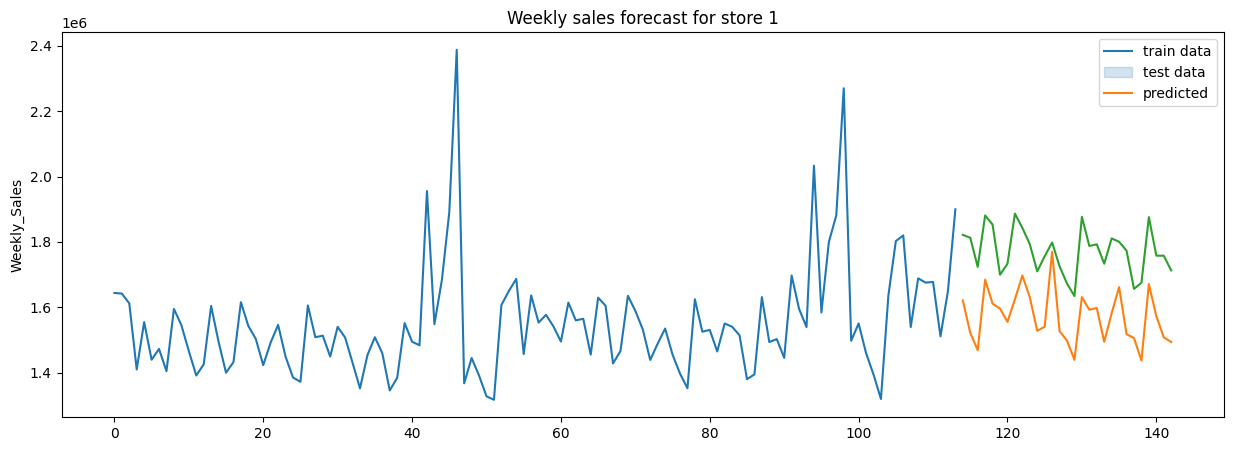

In [ ]:
train=store_01[:int(0.8*len(store_01))]
test=store_01[int(0.8*len(store_01)):]
model=SARIMAX(train,order=(0,1,2),seasonal_order=(0,1,2,52))
model_fit=model.fit()
pre=model_fit.predict(start=int(0.8*len(store_01)),end=len(store_01)-1)
pre.index=test.index

plt.figure(figsize=(15,5))
sns.lineplot(train)
sns.lineplot(test)
sns.lineplot(pre)
plt.legend(loc='best',labels=['train data','test data','predicted'])
plt.title('Weekly sales forecast for store 1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


SARIMAX model successfully captures the overall seasonality and pattern of fluctuations observed in the actual sales data

Improving the plot by taking another column named Holiday_Flag since we found seasoning trend in the end of the year spiking in weekly sales

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


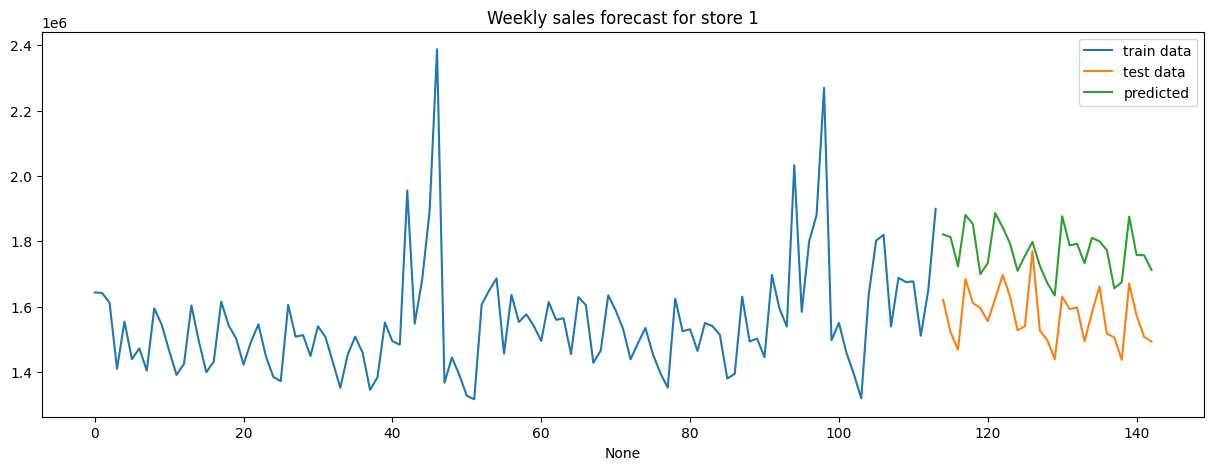

In [ ]:
# Splitting data
train_end = int(0.8 * len(store_01))
train = store_01.iloc[:train_end]
test = store_01.iloc[train_end:]

# Endogenous variable
endog_train = train
endog_test = test

# Exogenous variable
# Assuming 'Holiday_Flag' is relevant and available for Store 1 and aligns with the date index of store_01
# Need to filter the original df to get the 'Holiday_Flag' for Store 1 and align it with the time series data
holiday_flag_store_1 = df[df['Store']==1].set_index(store_01.index)['Holiday_Flag']
exog_train = holiday_flag_store_1.iloc[:train_end]
exog_test = holiday_flag_store_1.iloc[train_end:]


# Define and fit SARIMAX model with exogenous variable
model = SARIMAX(endog_train, order=(0,1,2), seasonal_order=(0,1,2,52), exog=exog_train)
model_fit = model.fit()

# Predict using exogenous variable in test set
pre = model_fit.predict(start=train_end, end=len(store_01)-1, exog=exog_test)


# Plotting
plt.figure(figsize=(15,5))
sns.lineplot(x=train.index, y=train.values, label='train data')
sns.lineplot(x=test.index, y=test.values, label='test data')
sns.lineplot(x=pre.index, y=pre.values, label='predicted')
plt.title('Weekly sales forecast for store 1')
plt.legend(loc='best')
plt.show()

the prediction is similar to the above with only weekly sales but there is
The predicted weekly sales values for store 1 closely follow the overall seasonality and trend patterns of the actual sales data, indicating that the SARIMAX model has effectively learned the underlying structure of weekly sales cycles. However, the model captures fluctuations and timing well

To achieve more accurate absolute predictions, refining the model by incorporating relevant exogenous features and further tuning parameters is needed. Overall, the model provides a solid foundation for forecasting

THE END